In [3]:
# Introduction: The task is to allocate a given marketing budget across three media channels—Google, Meta (Facebook), and Microsoft (Bing)—based on their past performance in generating revenue. The goal is to optimize the allocation so that the budget is distributed to maximize the expected revenue from each channel.
# The available performance metrics for each channel include:

# Conversion Rate: The percentage of users who take a desired action (e.g., make a purchase) out of the total number of users who interact with the channel.
# Cost Per Acquisition (CPA): The average cost spent to acquire a single customer through that channel.
# Return on Investment (ROI): The ratio of net profit to the cost of the investment, indicating the efficiency of the investment in that channel.
   
# Approach
# 1. Data Collection and Preperation
# 2. Normalize the metrics
# 3. Weighted Scoring
# 4. Budget Allocation
# This approach ensures that the budget is allocated efficiently based on each channel's historical performance. 
# By normalizing and weighting the metrics, the allocation process remains fair and focused on optimizing revenue generation across all channels.
    

In [1]:
# Libraries Used
# 1. Pandas - 2.1.1
# 2. numpy  - 1.24.3
# 3. seaborn - 0.12.2

# Importing all required libraries
import os
# For Data Manipulaton
import pandas as pd
# For Numerical Calculations
import numpy as np
# For Visual Representation of data
import seaborn as sns

In [3]:
# Input Section:

# Input budget
budget = int(input("Enter the budget:"))

# Reading the datasets of different media channels
os.chdir(r"E:\NetElixir-Agnition-Hackathon")
google_df    = pd.read_csv("google_df.csv")
meta_df      = pd.read_csv("meta_df.csv")
microsoft_df = pd.read_csv("microsoft_df.csv")

Enter the budget:1000


In [4]:
# Before merging data of all the media channels
# Add source column to each dataset
google_df["Source"] = "Google"
meta_df["Source"] = "Meta"
microsoft_df["Source"] = "Microsoft"

In [5]:
# Since there is no campaign type for Meta dataset, creating one with its value as Facebook
meta_df["Campaign type"] = "Facebook"

# Dropping column "Reach" from the meta dataset since it is not a common feature of all the datasets
meta_df = meta_df.drop("Reach", axis = 1)

In [6]:
# Merging all media channels into a single dataframe
media_df = pd.concat([google_df, meta_df, microsoft_df], axis = 0)
# print(media_df.head())
# media_df.tail()

In [7]:
# Approach & Methodology

# Understanding the combined data
# 1. Shows what are the columns available and their datatype
# 2. Finds will there are any null values
# 3. Total memory used by the dataframe
media_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2633 entries, 0 to 1084
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2633 non-null   object 
 1   Campaign type  2633 non-null   object 
 2   Impressions    2633 non-null   int64  
 3   Clicks         2633 non-null   int64  
 4   Cost           2633 non-null   float64
 5   Conversions    2633 non-null   float64
 6   Revenue        2633 non-null   float64
 7   Source         2633 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 185.1+ KB


In [8]:
# Since from the results of media_df.info() we got to know that there were no null values in entire dataset, 
# There is not need to check again for null values

# media_df.isnull().sum()

In [9]:
# Checking if any junk values are there in Date column by finding all the unique values in Date Feature 
np.unique(media_df.Date)

array(['01-01-2024', '01-02-2024', '01-03-2024', '01-04-2024',
       '01-05-2024', '01-06-2024', '02-01-2024', '02-02-2024',
       '02-03-2024', '02-04-2024', '02-05-2024', '02-06-2024',
       '03-01-2024', '03-02-2024', '03-03-2024', '03-04-2024',
       '03-05-2024', '03-06-2024', '04-01-2024', '04-02-2024',
       '04-03-2024', '04-04-2024', '04-05-2024', '04-06-2024',
       '05-01-2024', '05-02-2024', '05-03-2024', '05-04-2024',
       '05-05-2024', '05-06-2024', '06-01-2024', '06-02-2024',
       '06-03-2024', '06-04-2024', '06-05-2024', '06-06-2024',
       '07-01-2024', '07-02-2024', '07-03-2024', '07-04-2024',
       '07-05-2024', '07-06-2024', '08-01-2024', '08-02-2024',
       '08-03-2024', '08-04-2024', '08-05-2024', '08-06-2024',
       '09-01-2024', '09-02-2024', '09-03-2024', '09-04-2024',
       '09-05-2024', '09-06-2024', '10-01-2024', '10-02-2024',
       '10-03-2024', '10-04-2024', '10-05-2024', '10-06-2024',
       '11-01-2024', '11-02-2024', '11-03-2024', '11-04

In [10]:
# Checking if any junk values are there in Campiagn type column by finding all the unique values in Campaign type Feature
np.unique(media_df["Campaign type"])

array(['Audience', 'Cross-network', 'Display Network', 'Facebook',
       'Performance max', 'Search & content', 'Search Network',
       'Shopping', 'YouTube'], dtype=object)

In [11]:
# Checking if any junk values are there in Impressions column by finding all the unique values in Impressions Feature
np.unique(media_df.Impressions)

array([     0,      1,      2, ..., 634312, 650377, 698237], dtype=int64)

In [12]:
# Checking if any junk values are there in Clicks column by finding all the unique values in Clicks Feature
np.unique(media_df.Clicks)

array([    0,     1,     2, ...,  3457,  3690, 13429], dtype=int64)

In [13]:
# Checking if any junk values are there in Cost column by finding all the unique values in Cost Feature
np.unique(media_df.Cost)

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 5.7477e+03, 5.8533e+03,
       6.2183e+03])

In [14]:
# Checking if any junk values are there in Conversions column by finding all the unique values in Conversions Feature
np.unique(media_df.Conversions)

array([0.000e+00, 1.000e-01, 2.000e-01, 3.000e-01, 4.000e-01, 5.000e-01,
       6.000e-01, 7.000e-01, 8.000e-01, 9.000e-01, 1.000e+00, 1.100e+00,
       1.200e+00, 1.300e+00, 1.400e+00, 1.500e+00, 1.600e+00, 1.700e+00,
       1.900e+00, 2.000e+00, 2.200e+00, 2.300e+00, 2.400e+00, 2.500e+00,
       2.600e+00, 2.800e+00, 2.900e+00, 3.000e+00, 3.200e+00, 3.300e+00,
       4.000e+00, 4.100e+00, 4.500e+00, 5.000e+00, 6.000e+00, 6.100e+00,
       6.200e+00, 6.500e+00, 6.700e+00, 7.000e+00, 7.500e+00, 7.700e+00,
       7.800e+00, 8.000e+00, 8.100e+00, 8.500e+00, 8.600e+00, 8.800e+00,
       9.000e+00, 9.400e+00, 9.700e+00, 9.800e+00, 1.000e+01, 1.060e+01,
       1.090e+01, 1.100e+01, 1.160e+01, 1.170e+01, 1.180e+01, 1.200e+01,
       1.210e+01, 1.230e+01, 1.240e+01, 1.260e+01, 1.280e+01, 1.300e+01,
       1.330e+01, 1.340e+01, 1.350e+01, 1.370e+01, 1.400e+01, 1.410e+01,
       1.470e+01, 1.480e+01, 1.500e+01, 1.550e+01, 1.580e+01, 1.600e+01,
       1.610e+01, 1.630e+01, 1.640e+01, 1.650e+01, 

In [15]:
# Checking if any junk values are there in Revenue column by finding all the unique values in Revenue Feature
np.unique(media_df.Revenue)

array([0.00000e+00, 1.00000e-01, 2.00000e-01, ..., 3.04089e+04,
       3.25994e+04, 3.35282e+04])

In [16]:
# Describing all the numerical features
media_summary = media_df.describe()
media_summary

,Impressions,Clicks,Cost,Conversions,Revenue
count,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000
mean,59216.750855,542.647550,618.769464,23.954880,4134.103304
std,108238.102094,796.145894,977.778980,36.429305,5938.394958
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5365.000000,65.000000,61.400000,0.100000,4.000000
50%,14336.000000,245.000000,136.400000,9.000000,1258.600000
75%,46431.000000,592.000000,818.500000,30.000000,6132.800000
max,698237.000000,13429.000000,6218.300000,213.900000,33528.200000


In [17]:
# Rounding up the values upto 2 decimals
media_df.Impressions = round(media_df.Impressions, 2)
media_df.Clicks = round(media_df.Clicks, 2)
media_df.Cost = round(media_df.Cost, 2)
media_df.Conversions = round(media_df.Conversions, 2)
media_df.Revenue = round(media_df.Revenue, 2)

In [18]:
media_df.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,Source
0,01-01-2024,Cross-network,143669,896,656.3,6.5,1410.3,Google
1,01-01-2024,Display Network,3,0,0.0,0.0,0.0,Google
2,01-01-2024,Search Network,3701,251,496.5,4.5,576.4,Google
3,01-01-2024,YouTube,36211,8,115.2,0.0,0.0,Google
4,02-01-2024,Cross-network,183496,1172,1525.0,8.8,3565.7,Google


In [19]:
# Checking for duplicates in enire dataset
media_df.duplicated().sum()

0

C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Impressions'>

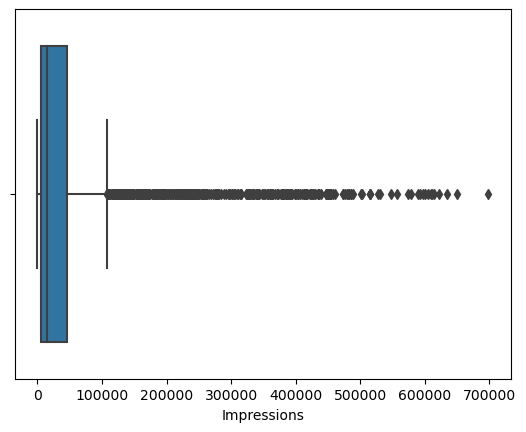

In [20]:
# Detecting outliers using Box plot in all numerical features
# 1.Impressions
sns.boxplot(x = media_df.Impressions)

C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Clicks'>

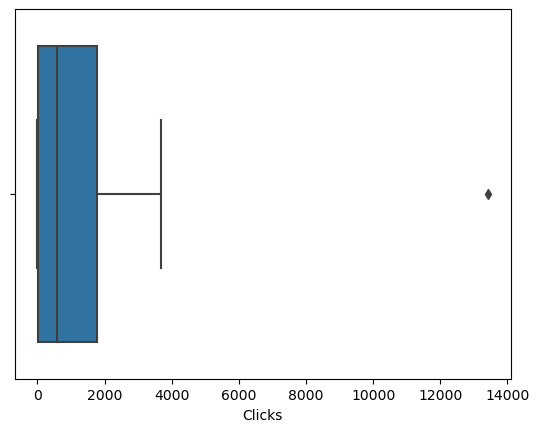

In [21]:
# 2. Clicks
sns.boxplot(x = google_df.Clicks)

C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cost'>

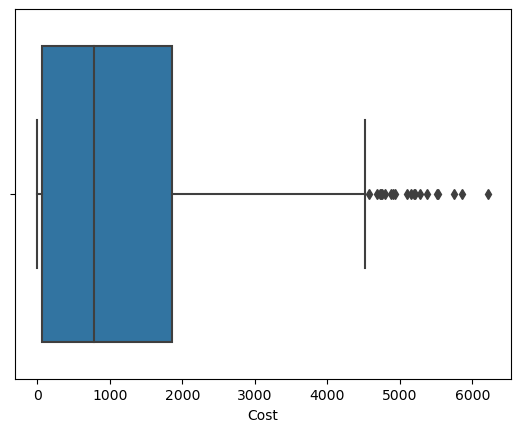

In [22]:
# 3. Cost
sns.boxplot(x = google_df.Cost)

C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Conversions'>

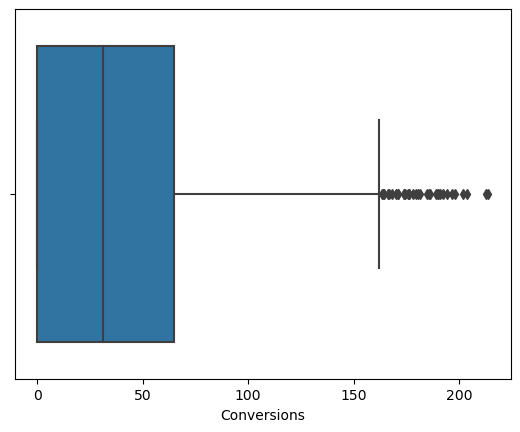

In [23]:
# Conversions
sns.boxplot(x = google_df.Conversions)

C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Revenue'>

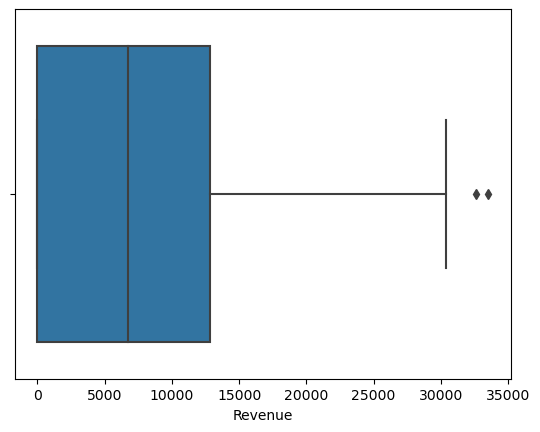

In [24]:
# Revenue
sns.boxplot(x = google_df.Revenue)

In [25]:
# After carful observation of the distributions of data points of Impression feature 
# with some other numerical features Cost, Cnoversions and Revenue,
# It is evident that since there were many data points having lower values(near 0), boxplot is showing some bigger values in "Impressions" as outliers.

# So there is no need to remove these outliers from the dataframe.

In [26]:
# Exploratory Data Analysis(EDA) on Campaign type(categorical variable)

pd.crosstab(index = media_df["Campaign type"], columns = "count")

col_0,count
Campaign type,
Audience,182
Cross-network,364
Display Network,274
Facebook,364
Performance max,175
Search & content,364
Search Network,364
Shopping,364
YouTube,182


In [27]:
# Relationship between Campaign type and Source
pd.crosstab(index = media_df["Campaign type"], columns = media_df["Source"])

Source,Google,Meta,Microsoft
Campaign type,,,
Audience,0,0,182
Cross-network,364,0,0
Display Network,274,0,0
Facebook,0,364,0
Performance max,0,0,175
Search & content,0,0,364
Search Network,364,0,0
Shopping,0,0,364
YouTube,182,0,0


In [28]:
# Joint Probability of Imressions and Cost
pd.crosstab(index = media_df["Impressions"], columns = media_df["Cost"], normalize = True)

Cost,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,5148.5,5193.1,5209.3,5269.4,5374.6,5509.8,5522.6,5747.7,5853.3,6218.3
Impressions,,,,,,,,,,,,,,,,,,,,,
0,0.000380,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000
1,0.003418,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000
2,0.002659,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000
3,0.001519,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000
4,0.006836,0.00038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613360,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000
622329,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00038,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000
634312,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00038,0.0,0.0,0.00000


In [29]:
# Selecting all the numerical features by excluding object type features from the dataset.
numerical_data = media_df.select_dtypes(exclude = [object])

In [30]:
# Correlation to find the strength of association between numerical variables
corr_matrix = numerical_data.corr() 

In [31]:
# Printing the results
print(corr_matrix)

             Impressions    Clicks      Cost  Conversions   Revenue
Impressions     1.000000  0.845422  0.872489     0.501449  0.509989
Clicks          0.845422  1.000000  0.850303     0.806618  0.774031
Cost            0.872489  0.850303  1.000000     0.642028  0.707235
Conversions     0.501449  0.806618  0.642028     1.000000  0.945319
Revenue         0.509989  0.774031  0.707235     0.945319  1.000000


<Axes: xlabel='Impressions', ylabel='Revenue'>

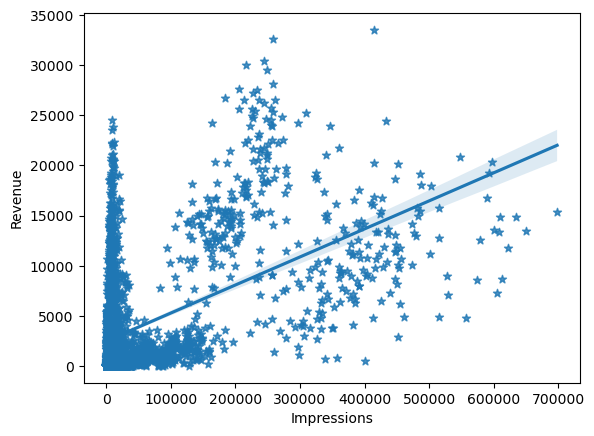

In [32]:
# Scatter plot on Impressions and Revenue
sns.regplot(x = media_df["Impressions"], y = media_df["Revenue"], marker = "*")

<Axes: xlabel='Cost', ylabel='Revenue'>

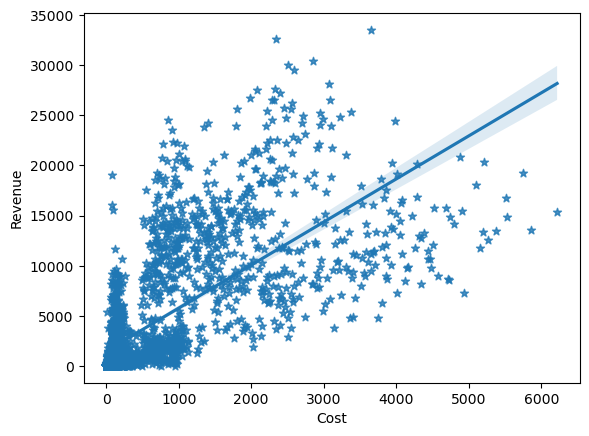

In [33]:
# Scatter plot on Cost and Revenue
sns.regplot(x = media_df["Cost"], y = media_df["Revenue"], marker = "*")

<Axes: xlabel='Clicks', ylabel='Revenue'>

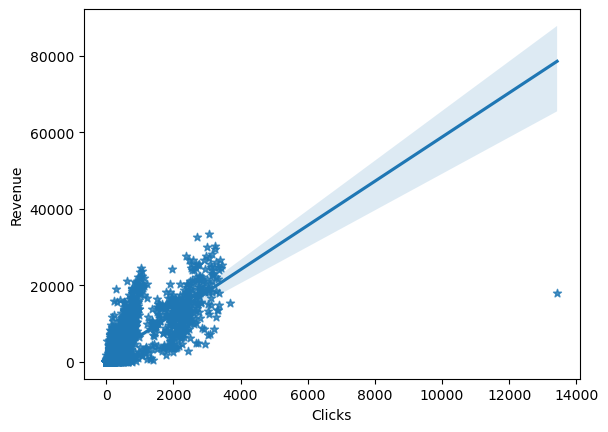

In [34]:
# Scatter plot on Clicks and Revenue
sns.regplot(x = media_df["Clicks"], y = media_df["Revenue"], marker = "*")

C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Campaign type', ylabel='count'>

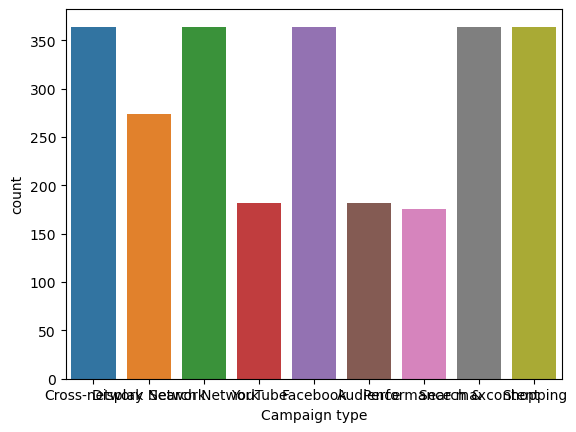

In [35]:
# Bar plot for comapaign type

sns.countplot(x = "Campaign type", data = media_df)

C:\Users\vishn\AppData\Local\Temp\ipykernel_20588\530816737.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(media_df["Impressions"])
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_n

<Axes: xlabel='Impressions', ylabel='Density'>

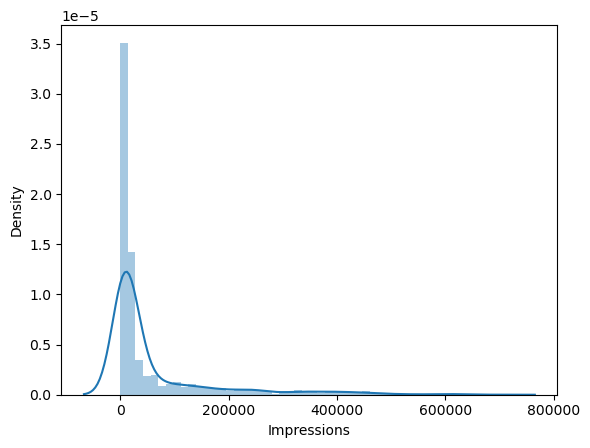

In [36]:
# Visual representation of Impressions using histogram
sns.distplot(media_df["Impressions"])

C:\Users\vishn\AppData\Local\Temp\ipykernel_20588\410838642.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(media_df["Cost"])
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

<Axes: xlabel='Cost', ylabel='Density'>

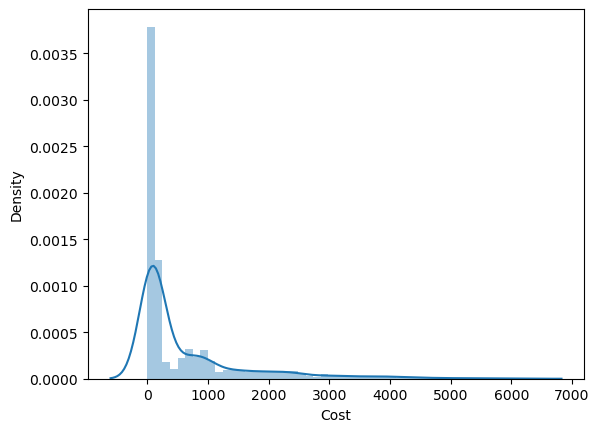

In [37]:
# Visual representation of Cost using histogram
sns.distplot(media_df["Cost"])

C:\Users\vishn\AppData\Local\Temp\ipykernel_20588\4092508289.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(media_df["Clicks"])
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', 

<Axes: xlabel='Clicks', ylabel='Density'>

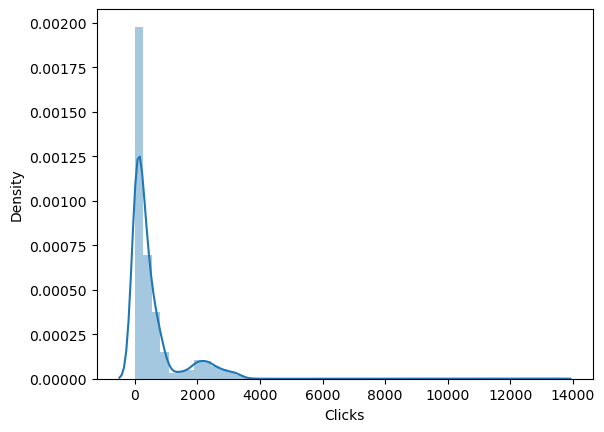

In [38]:
# Visual representation of Clicks using histogram
sns.distplot(media_df["Clicks"])

C:\Users\vishn\AppData\Local\Temp\ipykernel_20588\3033963180.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(media_df["Revenue"])
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na',

<Axes: xlabel='Revenue', ylabel='Density'>

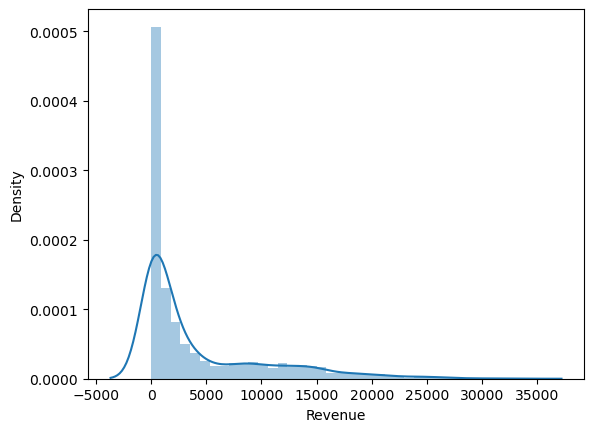

In [39]:
# Visual representation of Revenue using histogram
sns.distplot(media_df["Revenue"])

C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='Campaign type', ylabel='count'>

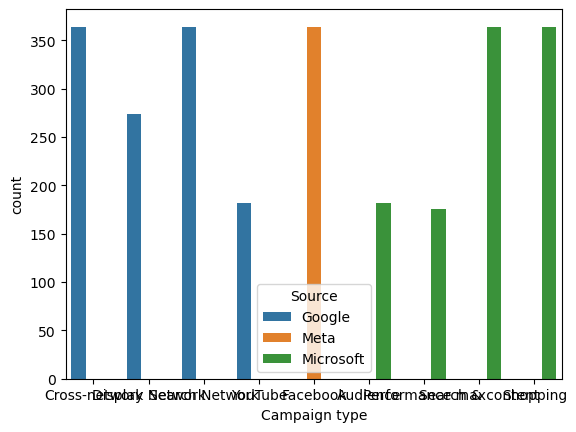

In [40]:
# Visual representation of campaign type and source features using Bar plot 
sns.countplot(x = "Campaign type", hue = "Source", data = media_df)

<Axes: xlabel='Impressions', ylabel='Cost'>

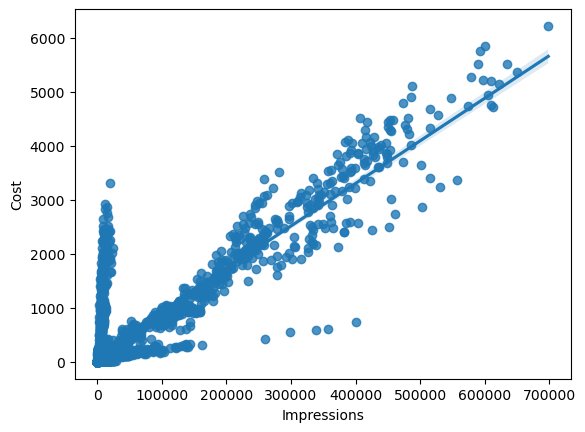

In [41]:
# Visual representation of Impressions using Scatter plot
sns.regplot(x = media_df["Impressions"], y = media_df["Cost"])

<Axes: xlabel='Impressions', ylabel='Conversions'>

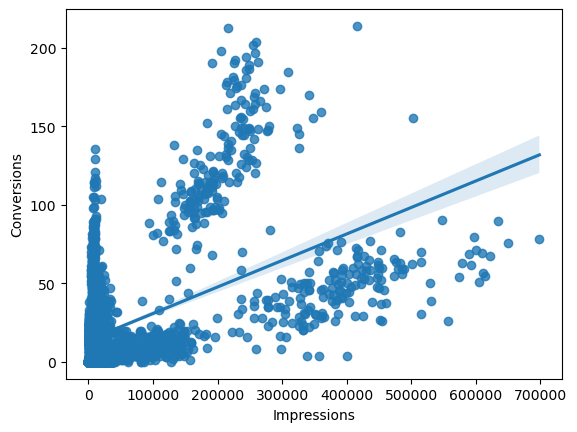

In [42]:
# Visual representation of Impressions and Conversions using scatter plot
sns.regplot(x = media_df["Impressions"], y = media_df["Conversions"])

<Axes: xlabel='Impressions', ylabel='Clicks'>

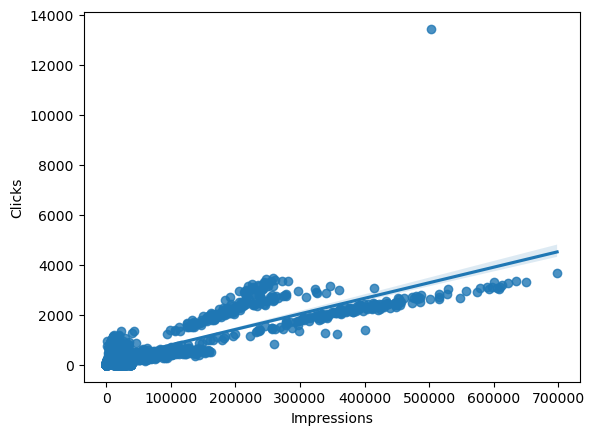

In [43]:
# Visual representation of Impressions and Clicks using scatter plot
sns.regplot(x = media_df["Impressions"], y = media_df["Clicks"])

<Axes: xlabel='Impressions', ylabel='Revenue'>

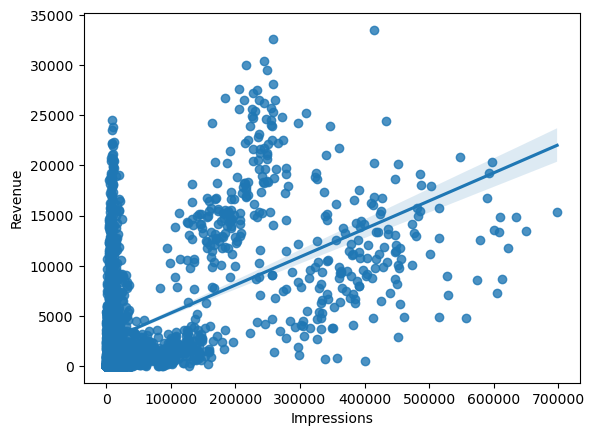

In [44]:
# Visual representation of Impressions and Revenue using scatter plot
sns.regplot(x = media_df["Impressions"], y = media_df["Revenue"])

In [45]:
# After carful observation of the distributions of data points of Impression feature 
# with some other numerical features Cost, Cnoversions and Revenue,
# It is evident that since there were many data points having lower values(near 0), boxplot is showing some bigger values in "Impressions" as outliers.

# So there is no need to remove these outliers from the dataframe.

In [46]:
# Rule Based Approach

# Allocation of budget should based on the performance of media channels, 
# it can be much more efficient if we go with Rule Based Approach


# Calculating the KPI's
# 1. Conversion Rate : It is the percentage of visitors or clicks that results in a desired action,
#     It shows hoe efficiently a media channel turns interactions into actual conversions
media_df["Conversion_Rate"] = media_df["Conversions"] / media_df["Clicks"]
# 2. CPA (Cost Per Acquisition): CPA measures the cost associated with acquiring a customer through a specific media channel.
# It tells you how much you need to spend to get one conversion
media_df["CPA"] = media_df["Cost"] / media_df["Conversions"]
# 3. ROI(Return on Investment) : ROI is a measure of the profitability of an investment. In the context of media channels, 
# it shows how much revenue is generated for every dollar spent.
media_df["ROI"] = (media_df["Revenue"] - media_df["Cost"]) / media_df["Cost"]

In [47]:
media_df.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,Source,Conversion_Rate,CPA,ROI
0,01-01-2024,Cross-network,143669,896,656.3,6.5,1410.3,Google,0.007254,100.969231,1.148865
1,01-01-2024,Display Network,3,0,0.0,0.0,0.0,Google,NaN,NaN,NaN
2,01-01-2024,Search Network,3701,251,496.5,4.5,576.4,Google,0.017928,110.333333,0.160926
3,01-01-2024,YouTube,36211,8,115.2,0.0,0.0,Google,0.000000,inf,-1.000000
4,02-01-2024,Cross-network,183496,1172,1525.0,8.8,3565.7,Google,0.007509,173.295455,1.338164


In [48]:
# Checking for null values after calculating the KPI's
media_df.isna().sum()

Date                 0
Campaign type        0
Impressions          0
Clicks               0
Cost                 0
Conversions          0
Revenue              0
Source               0
Conversion_Rate    190
CPA                 86
ROI                 86
dtype: int64

In [49]:
# Dropping the records with null values
media_df.dropna(axis = 0, inplace = True)

In [50]:
# Again checking if null values are gone or not
media_df.isna().sum()

Date               0
Campaign type      0
Impressions        0
Clicks             0
Cost               0
Conversions        0
Revenue            0
Source             0
Conversion_Rate    0
CPA                0
ROI                0
dtype: int64

In [51]:
# Checking for junk values in new created features
# 1. Conversion Rate
np.unique(media_df["Conversion_Rate"])

array([0.00000000e+00, 2.05761317e-04, 7.35294118e-04, ...,
       8.00000000e-01, 2.00000000e+00,            inf])

In [52]:
# 2. CPA
np.unique(media_df["CPA"])

array([5.00000000e-02, 6.33333333e-01, 1.00000000e+00, ...,
       1.16100000e+03, 1.19950000e+03,            inf])

In [53]:
# 3. ROI
np.unique(media_df["ROI"])

array([-1.00000000e+00, -9.96587031e-01, -9.90857143e-01, ...,
        2.25824228e+02,  4.30838710e+02,  1.93100000e+03])

In [54]:
# Replacing "inf" values. with 0
media_df["CPA"].replace(np.inf, 0, inplace = True)

In [55]:
# Replacing "inf" values. with 0
media_df["Conversion_Rate"].replace(np.inf, 0, inplace = True)

In [56]:
# Checking the sample data
media_df.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,Source,Conversion_Rate,CPA,ROI
0,01-01-2024,Cross-network,143669,896,656.3,6.5,1410.3,Google,0.007254,100.969231,1.148865
2,01-01-2024,Search Network,3701,251,496.5,4.5,576.4,Google,0.017928,110.333333,0.160926
3,01-01-2024,YouTube,36211,8,115.2,0.0,0.0,Google,0.000000,0.000000,-1.000000
4,02-01-2024,Cross-network,183496,1172,1525.0,8.8,3565.7,Google,0.007509,173.295455,1.338164
6,02-01-2024,Search Network,5764,492,1256.8,9.4,1266.2,Google,0.019106,133.702128,0.007479


In [57]:
# Round up the values upto 2 decimal places
media_df["Conversion_Rate"] = round(media_df["Conversion_Rate"], 2)
media_df["CPA"] = round(media_df["CPA"], 2)
media_df["ROI"] = round(media_df["ROI"], 2)

In [58]:
media_df.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,Source,Conversion_Rate,CPA,ROI
0,01-01-2024,Cross-network,143669,896,656.3,6.5,1410.3,Google,0.01,100.97,1.15
2,01-01-2024,Search Network,3701,251,496.5,4.5,576.4,Google,0.02,110.33,0.16
3,01-01-2024,YouTube,36211,8,115.2,0.0,0.0,Google,0.00,0.00,-1.00
4,02-01-2024,Cross-network,183496,1172,1525.0,8.8,3565.7,Google,0.01,173.30,1.34
6,02-01-2024,Search Network,5764,492,1256.8,9.4,1266.2,Google,0.02,133.70,0.01


In [59]:
# KPI'S - Key Performance Indicators
channels = media_df[["Conversion_Rate", "CPA", "ROI", "Source"]]

In [60]:
# # channels_averages = channels.groupby()
channels_averages = channels.groupby("Source").mean()
channels_averages

,Conversion_Rate,CPA,ROI
Source,,,
Google,0.043343,36.549164,5.866995
Meta,0.061154,13.533104,26.713571
Microsoft,0.047136,32.345979,9.156959


In [61]:
# Weights for each metrics
weights = {'Conversion_Rate': 0.4, 
           'CPA': 0.3, 
           'ROI': 0.3
          }

# Performance of media channel
performance_data = {
    "Source" : ["Google", "Facebook", "Microsoft"],
    "Conversion_Rate" : channels_averages["Conversion_Rate"],
    "CPA" : channels_averages["CPA"],
    "ROI" : channels_averages["ROI"]
}

In [62]:
# Creating a new dataframe for the KPI's along with Source
df_performance = pd.DataFrame(performance_data)

In [63]:
# Normalizing the feature values to maintain consistency
df_performance['Normalized_Conversion_Rate'] = df_performance['Conversion_Rate'] / df_performance['Conversion_Rate'].sum()
df_performance['Normalized_CPA'] = 1 / df_performance['CPA']  # Lower CPA is better
df_performance['Normalized_CPA'] = df_performance['Normalized_CPA'] / df_performance['Normalized_CPA'].sum()
df_performance['Normalized_ROI'] = df_performance['ROI'] / df_performance['ROI'].sum()


In [64]:
# Calculating the total performance score
df_performance['Performance_Score'] = (
    df_performance['Normalized_Conversion_Rate'] * weights['Conversion_Rate'] +
    df_performance['Normalized_CPA'] * weights['CPA'] +
    df_performance['Normalized_ROI'] * weights['ROI']
)

In [65]:
# Allocating the budget to each media channel based on their performance score
df_performance['Allocated_Budget'] = df_performance['Performance_Score'] * budget


In [66]:
# Round up the value
df_performance.Allocated_Budget = round(df_performance.Allocated_Budget)

In [67]:
# Converting decimal values to integers
df_performance.Allocated_Budget = df_performance.Allocated_Budget.astype("int64")

In [68]:
# Final Results
print("Google Ads:", df_performance.Allocated_Budget[0])
print("Facebook :", df_performance.Allocated_Budget[1])
print("Microsoft Ads:", df_performance.Allocated_Budget[2])

Google Ads: 219
Facebook : 521
Microsoft Ads: 260


C:\Users\vishn\AppData\Local\Temp\ipykernel_20588\3573751090.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Google Ads:", df_performance.Allocated_Budget[0])
C:\Users\vishn\AppData\Local\Temp\ipykernel_20588\3573751090.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Facebook :", df_performance.Allocated_Budget[1])
C:\Users\vishn\AppData\Local\Temp\ipykernel_20588\3573751090.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Source', ylabel='Allocated_Budget'>

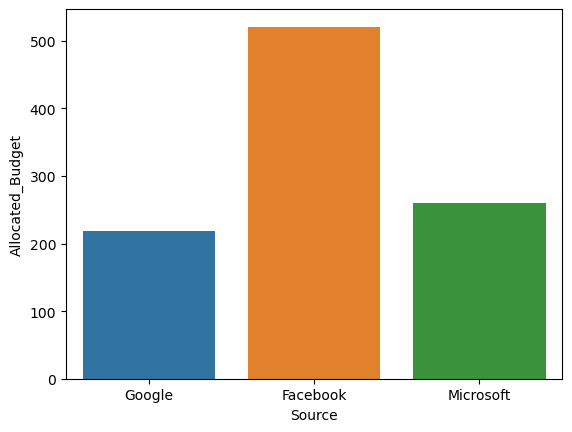

In [69]:
sns.barplot(x = df_performance["Source"], y = df_performance["Allocated_Budget"])

In [70]:
# # Conclusion
# Performance Metrics: The analysis of the media channels revealed the following key insights:
#         1.Meta (Facebook) had the highest Conversion Rate and ROI, indicating that it is the most efficient in converting users and generating profit relative to the cost.
#         2.Google and Microsoft had lower Conversion Rates and ROI compared to Meta, but they still contribute significantly to the overall marketing strategy.
        
# Budget Allocation: Based on the performance metrics, the budget was allocated proportionally, with Meta receiving the largest share due to its superior ROI and Conversion Rate.
#     This approach optimizes the potential revenue generation from the given budget    

In [71]:
# Future Work:
#     1. Dynamic Weighting: Explore dynamic weighting of performance metrics based on real-time data or seasonal trends. This would allow the model to adapt to changes in channel performance over time.
#     2. Incorporate Additional Metrics: Consider including other metrics like customer lifetime value (CLTV) or engagement rates for a more comprehensive budget allocation strategy
#     3. Predictive Modeling: Implement more advanced predictive models, such as time-series forecasting or machine learning algorithms, to predict future channel performance and adjust the budget allocation accordingly.
#     4. Automated Budget Reallocation: Develop a system that can automatically reallocate the budget periodically based on updated performance data, ensuring continuous optimization.
     
# These improvements and future work can help further refine the budget allocation process, leading to even better ROI and overall marketing effectiveness.    

In [72]:
# References

1. Luzon, Y., Pinchover, R., & Khmelnitsky, E. (2022). Dynamic budget allocation for social media advertising campaigns: optimization and learning. European Journal of Operational Research, 299(1), 223-234.
2. Alon, N., Gamzu, I., & Tennenholtz, M. (2012, April). Optimizing budget allocation among channels and influencers. In Proceedings of the 21st international conference on World Wide Web (pp. 381-388).
3. Weinberg, B. D., & Pehlivan, E. (2011). Social spending: Managing the social media mix. Business horizons, 54(3), 275-282.
4. Han, X., Wang, L., & Fan, W. (2023). Cost-effective social media influencer marketing. INFORMS Journal on Computing, 35(1), 138-157.
5. Varela-Neira, C., Dwivedi, Y. K., & Camoiras-Rodriguez, Z. (2023). Social media marketing system: conceptualization, scale development and validation. Internet Research, 33(4), 1302-1330.
6. Almestarihi, R., Ahmad, A. Y. A. B., Frangieh, R., Abu-AlSondos, I., Nser, K., & Ziani, A. (2024). Measuring the ROI of paid advertising campaigns in digital marketing and its effect on business profitability. Uncertain Supply Chain Management, 12(2), 1275-1284.
7. Ziakis, C., & Vlachopoulou, M. (2023). Artificial intelligence in digital marketing: Insights from a comprehensive review. Information, 14(12), 664.
8. Cai, T., Jiang, J., Zhang, W., Zhou, S., Song, X., Yu, L., ... & Zhang, G. (2023, February). Marketing budget allocation with offline constrained deep reinforcement learning. In Proceedings of the Sixteenth ACM International Conference on Web Search and Data Mining (pp. 186-194).
9. Angelen, J., & Siddik, M. M. (2023). Role of Artificial Intelligence (AI) in Marketing. Journal of Survey in Fisheries Sciences, 10(3S), 6540-6549.
10. Efendioğlu, İ. (2023). The change of digital marketing with artificial intelligence. In 7th International Conference on Applied Research in Management, Economics and Accounting, Dublin, Ireland. https://doi. org/10.33422/7th. iarmea (Vol. 101).
11. Gao, B., Wang, Y., Xie, H., Hu, Y., & Hu, Y. (2023). Artificial intelligence in advertising: advancements, challenges, and ethical considerations in targeting, personalization, content creation, and ad optimization. Sage Open, 13(4), 21582440231210759.
12. Kumar, V., Ashraf, A. R., & Nadeem, W. (2024). AI-powered marketing: What, where, and how?. International Journal of Information Management, 77, 102783.
13. Han, X., Wang, L., & Fan, W. (2023). Cost-effective social media influencer marketing. INFORMS Journal on Computing, 35(1), 138-157.
14. Iankovets, T. (2023). MEDIA PLANNING OF DIGITAL ADVERTISING CAMPAIGNS. Eastern-European Journal of Enterprise Technologies, 126(13).


SyntaxError: invalid decimal literal (1857434908.py, line 4)